In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset= pd.read_csv("bread basket.csv")

In [17]:
dataset.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


No missing data

In [19]:
dataset['date_time']= pd.to_datetime(dataset['date_time'])
dataset.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [20]:
dataset['date']= dataset.date_time.dt.date
dataset['time']= dataset.date_time.dt.time
dataset['month']= dataset.date_time.dt.month
dataset['month']= dataset['month'].replace(
            (1,2,3,4,5,6,7,8,9,10,11,12),
            ('January','February','March','April','May','June','July','August','September','October','November','December')
            )
dataset['hour']= dataset.date_time.dt.hour

hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
dataset['hour']= dataset['hour'].replace(hour_in_num, hour_in_obj)
dataset['weekday'] = dataset['date_time'].dt.weekday
dataset['weekday'] = dataset['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))


dataset.drop('date_time', axis=1, inplace=True)

dataset.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [21]:
dataset['Item']= dataset['Item'].str.strip()
dataset['Item']= dataset['Item'].str.lower()

dataset.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


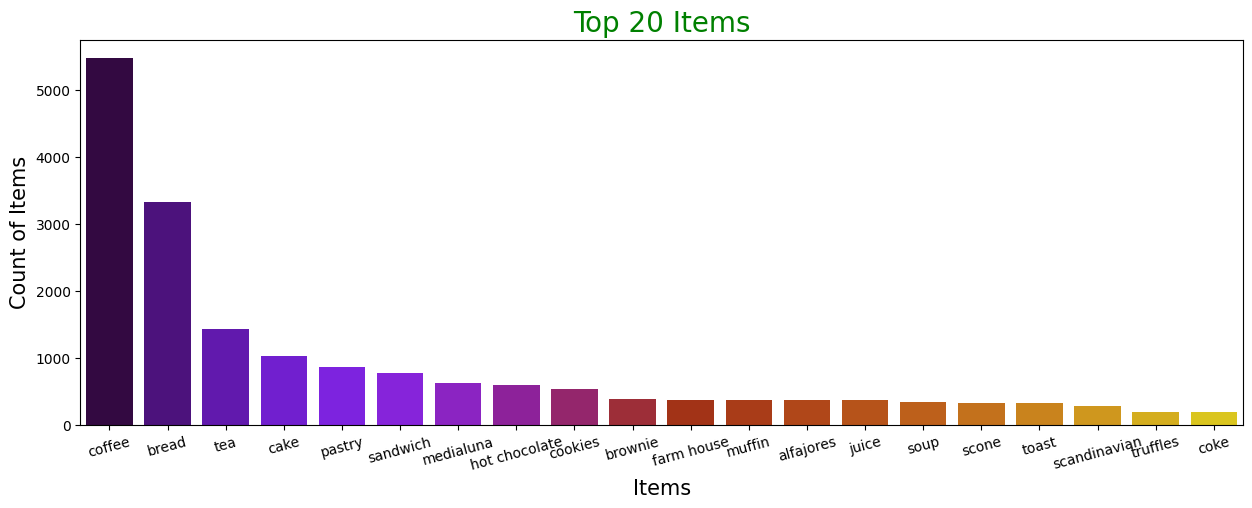

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x= dataset.Item.value_counts().head(20).index, y= dataset.Item.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Items', size= 15)
plt.xticks(rotation=15)
plt.ylabel('Count of Items', size= 15)
plt.title('Top 20 Items', color= 'green', size=20)
plt.show()

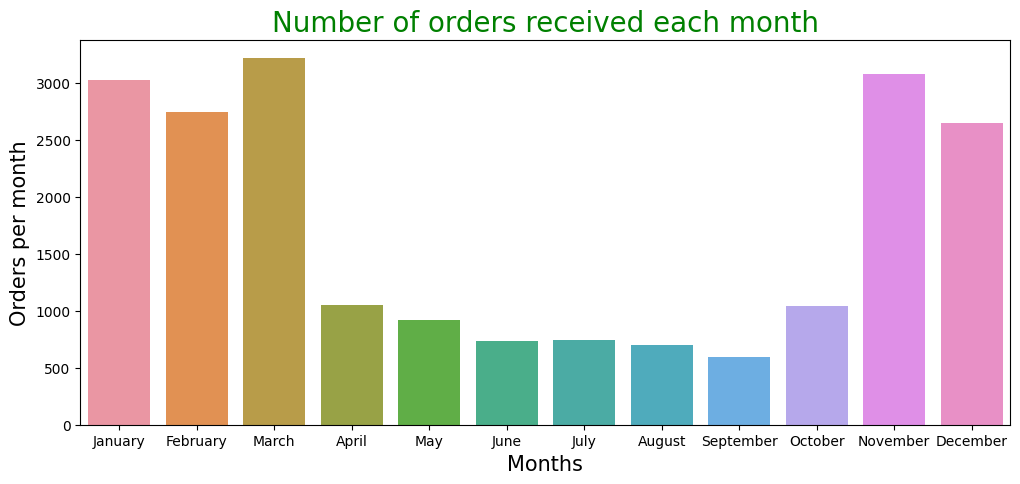

In [23]:
monthTrn= dataset.groupby('month')['Transaction'].count().reset_index()
monthTrn.loc[:, 'monthorder']= [4,8,12,2,1,7,6,3,5,11,10,9]
monthTrn.sort_values("monthorder", inplace= True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTrn, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

Mais transações estão nos meses de Março, Novembro, Janeiro, Fervereiro e Dezembro